In [19]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
houses = pd.read_csv('HW4-data.txt',sep='\t')

In [3]:
houses

,Flood,MinorityPop,FireReport,CrimeRate,HouseAge,Income,Declination
0,2,54.0,34.1,68.0,52.6,82.31,0.30
1,2,4.9,11.0,75.0,42.6,214.80,0.02
2,1,7.1,6.9,18.0,78.5,111.04,0.02
3,3,5.3,7.3,31.0,90.1,106.94,0.40
4,1,21.5,15.1,25.0,89.8,96.31,1.10
5,1,43.1,29.1,34.0,82.7,79.95,1.90
6,1,1.1,2.2,14.0,40.2,137.22,0.02
7,3,1.0,5.7,11.0,27.9,162.50,0.02
8,2,1.7,2.0,11.0,7.7,136.86,0.02
9,1,1.6,2.5,22.0,63.8,124.05,0.02


In [4]:
X = houses.copy(deep=True)

In [5]:
X['intercept'] = [1]*len(X)
X[['Flood_2','Flood_3']] = pd.get_dummies(houses['Flood'],prefix='Flood',drop_first=True)
X.drop(labels=['Flood'],axis=1,inplace=True)

In [6]:
y = X['Declination']/100
X.drop(labels=['Declination'],axis=1,inplace=True)

In [7]:
X.columns

Index(['MinorityPop', 'FireReport', 'CrimeRate', 'HouseAge', 'Income',
       'intercept', 'Flood_2', 'Flood_3'],
      dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = X[['intercept', 'Flood_2', 'Flood_3']]
list(X_scaled.columns).extend(['MinorityPop', 'FireReport', 'CrimeRate', 'HouseAge', 'Income'])
X_scaled[['MinorityPop', 'FireReport', 'CrimeRate', 'HouseAge', 'Income']] = pd.DataFrame(data = ss.fit_transform(X[['MinorityPop', 'FireReport', 'CrimeRate', 'HouseAge', 'Income']]))

/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [9]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled,y,test_size=0.1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

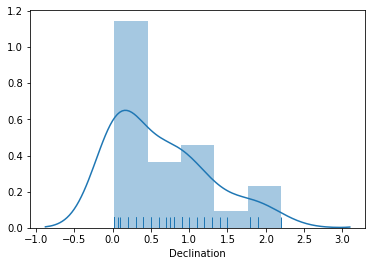

In [12]:
sns.distplot(houses['Declination'],rug=True)

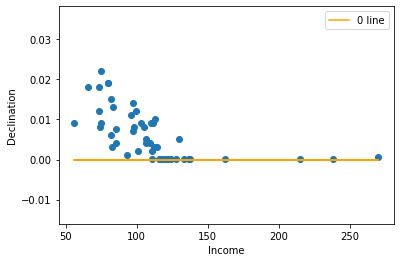

In [13]:
plt.scatter(houses['Income'],y)
plt.plot(houses['Income'],[0]*len(y),color='orange',label='0 line')
plt.xlabel('Income')
plt.ylabel('Declination')
plt.legend()

In [14]:
houses.corr()['Declination']

Flood         -0.309176
MinorityPop    0.692207
FireReport     0.679315
CrimeRate      0.153963
HouseAge       0.432281
Income        -0.575247
Declination    1.000000
Name: Declination, dtype: float64

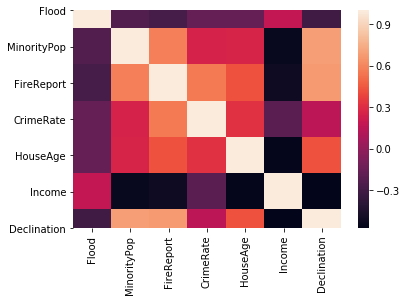

In [15]:

sns.heatmap(houses.corr())

### Models for individual Columns

In [20]:
for col in X.drop(labels=['Flood_2','Flood_3','intercept'],axis=1).columns:
    print('Model with: ',col)
    model = sm.GLM(y_train,X_train[['intercept',col]],family=sm.families.Binomial(sm.families.links.logit)).fit()
    print('Mean_absolute_error: ',mean_absolute_error(y_train,model.predict(X_train[['intercept',col]])))
    print('R_squared: ',r2_score(y_train,model.predict(X_train[['intercept',col]])))
    print()

print('Model with Flood_2 and Flood_3')    
model = sm.GLM(y_train,X_train[['intercept','Flood_2','Flood_3']],family=sm.families.Binomial(sm.families.links.logit)).fit()
print('Mean_absolute_error: ',mean_absolute_error(y_train,model.predict(X_train[['intercept','Flood_2','Flood_3']])))
print('R_squared: ',r2_score(y_train,model.predict(X_train[['intercept','Flood_2','Flood_3']])))

Model with:  MinorityPop
Mean_absolute_error:  0.00395153713733702
R_squared:  0.37411789063499956

Model with:  FireReport
Mean_absolute_error:  0.004047663342427103
R_squared:  0.18272211876945355

Model with:  CrimeRate
Mean_absolute_error:  0.004991925774081022
R_squared:  0.01159529400270054

Model with:  HouseAge
Mean_absolute_error:  0.004331743339509267
R_squared:  0.18774944877910882

Model with:  Income
Mean_absolute_error:  0.00347838953972599
R_squared:  0.4508285572172108

Model with Flood_2 and Flood_3
Mean_absolute_error:  0.004361596782322592
R_squared:  0.1836330781642127


/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling Family(..) with

In [21]:
r2_score(y_test,model.predict(X_test[['intercept','Flood_2','Flood_3']]))

0.06449464705587504

### OLS Statsmodels

In [22]:
ols = sm.OLS(y_train,X_train).fit()

In [23]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Declination   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     10.60
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           3.09e-07
Time:                        11:13:26   Log-Likelihood:                 190.73
No. Observations:                  45   AIC:                            -365.5
Df Residuals:                      37   BIC:                            -351.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
MinorityPop  7.382e-05   2.34e-05      3.155      0.003    2.64e-05       0.000
FireReport      0.0003      0.000      3.219      0.003       0.000       0.001
CrimeRate   -8.657e-05   3.36e-05     -2.573      0.014      -0.000   -1.84e-05
HouseAge     3.345e-05   3.29e-05      1.016      0.316   -3.33e-05       0.000
Income      -1.531e-05   2.05e-05     -0.745      0.461   -5.69e-05    2.63e-05
intercept       0.0028      0.004      0.693      0.493      -0.005       0.011
Flood_2        -0.0005      0.002     -0.298      0.767      -0.004       0.003
Flood_3        -0.0007      0.002     -0.422      0.676      -0.004       0.003
==============================================================================
Omnibus:                        2.249   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                1.306
Skew:                           0.212   Prob(JB):                        0.520
Kurtosis:                       3.719   Cond. No.                         976.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
ols_pred = ols.predict(X_train)
ols_pred

32    0.001549
12    0.001679
6     0.001624
24    0.005047
11    0.002779
22    0.002807
7     0.001579
8     0.000302
5     0.014197
1    -0.002048
26    0.003605
16    0.014387
30    0.009023
34    0.014217
38    0.009379
21    0.007309
42    0.005922
14    0.007090
31    0.001651
27    0.002985
37    0.007735
4     0.008734
25    0.003355
41    0.000791
49    0.003310
15    0.010131
19    0.013215
0     0.012193
2     0.004958
36   -0.001521
48    0.005128
18    0.008540
45    0.005070
28    0.014234
47   -0.000408
3     0.003626
20    0.013474
43    0.007667
13    0.003302
33    0.014637
29    0.015929
35    0.011592
39    0.007412
9     0.002058
46    0.001753
dtype: float64

In [25]:
X_train

,MinorityPop,FireReport,CrimeRate,HouseAge,Income,intercept,Flood_2,Flood_3
32,1.5,5.0,32.0,61.8,118.76,1,1,0
12,1.0,2.2,9.0,44.4,127.65,1,0,1
6,1.1,2.2,14.0,40.2,137.22,1,0,0
24,19.6,10.5,36.0,73.5,99.48,1,1,0
11,1.8,5.4,27.0,85.1,116.00,1,0,1
22,10.0,6.2,29.0,60.4,117.44,1,1,0
7,1.0,5.7,11.0,27.9,162.50,1,0,1
8,1.7,2.0,11.0,7.7,136.86,1,1,0
5,43.1,29.1,34.0,82.7,79.95,1,0,0
1,4.9,11.0,75.0,42.6,214.80,1,1,0


In [26]:
future_dpt = [1,7,34,90,1000,1,1,0]
ols.predict(future_dpt)

array([-0.01054543])

In [27]:
ols_test_pred = ols.predict(X_test)
mean_absolute_error(y_test,ols_test_pred)

0.0024058556819344275

In [28]:
result_dict = {'Model':[],'MeanAbsoluteError':[],'0-1TargetRangeSatisfied':[]}

In [29]:
result_dict['Model'].append('OrdinaryLeastSquares')
result_dict['MeanAbsoluteError'].append(0.0009937013883552562)
result_dict['0-1TargetRangeSatisfied'].append('No')

### GLM statsmodels

In [30]:
import statsmodels.api as sm

In [31]:
glm_reg = sm.GLM(y_train,X_train).fit()
glm_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Declination   No. Observations:                   45
Model:                            GLM   Df Residuals:                       37
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                      1.4828e-05
Method:                          IRLS   Log-Likelihood:                 190.73
Date:                Wed, 01 Dec 2021   Deviance:                   0.00054863
Time:                        11:13:45   Pearson chi2:                 0.000549
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
MinorityPop  7.382e-05   2.34e-05      3.155      0.002     2.8e-05       0.000
FireReport      0.0003      0.000      3.219      0.001       0.000       0.001
CrimeRate   -8.657e-05   3.36e-05     -2.573      0.010      -0.000   -2.06e-05
HouseAge     3.345e-05   3.29e-05      1.016      0.310   -3.11e-05     9.8e-05
Income      -1.531e-05   2.05e-05     -0.745      0.456   -5.56e-05    2.49e-05
intercept       0.0028      0.004      0.693      0.488      -0.005       0.011
Flood_2        -0.0005      0.002     -0.298      0.766      -0.004       0.003
Flood_3        -0.0007      0.002     -0.422      0.673      -0.004       0.002
===============================================================================
"""

In [32]:
glm_reg_pred = glm_reg.predict(X_train)
mean_absolute_error(y_train,glm_reg_pred)

0.0026340370085357156

In [33]:
r2_score(y_train,glm_reg_pred)

0.6673153984864949

In [279]:
glm_reg_pred

48    0.004560
15    0.010461
30    0.009411
4     0.009249
22    0.002899
47    0.000100
5     0.014330
1    -0.001484
0     0.011668
28    0.014265
40    0.006698
39    0.006932
35    0.011808
36   -0.001373
24    0.005120
14    0.007263
8    -0.000027
33    0.014781
41    0.000510
10    0.001819
26    0.003846
9     0.002688
3     0.003467
45    0.004949
27    0.002662
19    0.012452
34    0.014268
42    0.005247
21    0.006980
49    0.003159
6     0.002057
31    0.000855
37    0.007632
11    0.002637
44    0.005349
13    0.003103
7     0.001034
2     0.005566
12    0.001165
20    0.013629
23    0.003860
16    0.014463
29    0.015769
43    0.007014
25    0.002963
dtype: float64

In [34]:
glm_reg_pred_test = glm_reg.predict(X_test)
mean_absolute_error(y_test,glm_reg_pred_test)

0.0024058556819344275

In [35]:
r2_score(y_test,glm_reg_pred_test)

0.8221457750954279

In [314]:
result_dict['Model'].append('GeneralizedLinearModel - GaussianDist')
result_dict['MeanAbsoluteError'].append(0.0009937013883552562)
result_dict['0-1TargetRangeSatisfied'].append('No')

### Statsmodels GLM with Binomial Family and Logit link

In [36]:
glm = sm.GLM(y_train,X_train,family=sm.families.Binomial(link=sm.families.links.logit)).fit()

/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


In [37]:
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Declination   No. Observations:                   45
Model:                            GLM   Df Residuals:                       37
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1.3392
Date:                Wed, 01 Dec 2021   Deviance:                     0.097370
Time:                        11:14:53   Pearson chi2:                   0.0942
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
MinorityPop     0.0076      0.090      0.084      0.933      -0.169       0.184
FireReport      0.0338      0.298      0.113      0.910      -0.551       0.619
CrimeRate      -0.0096      0.097     -0.099      0.921      -0.200       0.181
HouseAge        0.0119      0.147      0.081      0.935      -0.277       0.301
Income         -0.0168      0.163     -0.103      0.918      -0.335       0.302
intercept      -4.7883     24.039     -0.199      0.842     -51.904      42.328
Flood_2         0.1796      5.792      0.031      0.975     -11.173      11.532
Flood_3         0.1589      5.566      0.029      0.977     -10.750      11.068
===============================================================================
"""

In [38]:
train_pred = glm.predict(X_train)

In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,train_pred)

0.0026176820908033497

In [40]:
r2_score(y_train,train_pred)

0.6195946270707994

In [77]:
y_train.mean()

0.006217777777777781

In [81]:
print(min(y_train), max(y_train))
print(min(train_pred),max(train_pred))

0.0002 0.019
0.0002484469898937148 0.021212203447865185


In [41]:
test_pred_logit = glm.predict(X_test)
mean_absolute_error(y_test,test_pred_logit)

0.005006170833671414

In [42]:
r2_score(y_test,test_pred_logit)

0.17550435908543338

In [315]:
result_dict['Model'].append('GeneralizedLinearModel - Binomial&Logitlink')
result_dict['MeanAbsoluteError'].append(0.003427252359408609)
result_dict['0-1TargetRangeSatisfied'].append('Yes')

### Logistic Regression with Binomial Families and Logit link - Standardized Data

In [43]:
glm_std = sm.GLM(y_scaled_train, X_scaled_train, family=sm.families.Binomial(sm.families.links.logit)).fit()


/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


In [44]:
train_pred_std_log = glm_std.predict(X_scaled_train)
mean_absolute_error(y_scaled_train,train_pred_std_log)

0.0027111005137465663

In [45]:
test_pred_std_log = glm_std.predict(X_scaled_test)
mean_absolute_error(y_scaled_test,test_pred_std_log)

0.0029190020219519576

In [47]:
r2_score(y_scaled_test,test_pred_std_log)

0.6158694057602296

In [322]:
for va1, va2 in zip(y_scaled_test, test_pred_std_log):
    print(va1,va2)

0.001 0.005528879529053601
0.013999999999999999 0.011809040812865193
0.009000000000000001 0.005557675091545883
0.0002 0.004779971201060598
0.0002 0.0001701863924276954


In [323]:
result_dict['Model'].append('GLM - Binomial&Logitlink StandardizedData')
result_dict['MeanAbsoluteError'].append(0.002954389686655085)
result_dict['0-1TargetRangeSatisfied'].append('Yes')

### Linear Regression with Logit Transformation

In [48]:
import numpy as np
from sklearn.linear_model import LinearRegression


class LogitRegression(LinearRegression):

    def fit(self, x, p):
        p = np.asarray(p)
        y = np.log(p / (1 - p))
        return super().fit(x, y)

    def predict(self, x):
        y = super().predict(x)
        return 1 / (np.exp(-y) + 1)





n = len(X_train)
noise = 0.00001 * np.random.randn(n)
p = np.tanh(y_train + noise)

model = LogitRegression()
model.fit(X_train, p)

print(mean_absolute_error(y_test,model.predict(X_test)))

0.012606508064217894


In [49]:
for v1, v2 in zip(p,y_train):
    print(v1,v2)

0.00021154350450528707 0.0002
0.00018522930475486503 0.0002
0.00018455056531464935 0.0002
0.012000178563338607 0.012
0.00018530204024349748 0.0002
0.0001911847350311947 0.0002
0.00020470438525241284 0.0002
0.00019952152459984295 0.0002
0.018999684129005382 0.019
0.00019286942017430754 0.0002
0.006999531707520339 0.006999999999999999
0.018018326202678715 0.018000000000000002
0.003981026343737885 0.004
0.021995292265791867 0.022000000000000002
0.009003081382329163 0.009000000000000001
0.005996298941533346 0.006
0.005004859078799007 0.005
0.007985477128068586 0.008
0.00018730072580328886 0.0002
0.00299893476173135 0.003
0.008978187337537953 0.009000000000000001
0.011002123187085131 0.011000000000000001
0.005002557687548497 0.005
0.00018349275640093226 0.0002
0.012017181117635065 0.012
0.007986977490088734 0.008
0.018986298458558763 0.019
0.002996532032644977 0.003
0.0001973501750560764 0.0002
0.00019489830551346928 0.0002
0.007491909721132138 0.0075
0.0089955159737005 0.009000000000000001

In [50]:
mean_absolute_error(y_train,model.predict(X_train))

0.003193732433132612

In [51]:
#n = len(X_train)
#noise = 0.00001 * np.random.randn(n)
p = np.tanh(y_train)

model = LogitRegression()
model.fit(X_train, p)

mean_absolute_error(y_train,model.predict(X_train))

0.0031816587899950012

In [52]:
r2_score(y_test,model.predict(X_test))

-11.638760463149394

In [199]:
for v1, v2 in zip(y_train,p):
    print(v1,v2)

0.0002 0.0001999999973333334
0.0002 0.0001999999973333334
0.005 0.004999958333749996
0.013000000000000001 0.012999267716169015
0.009000000000000001 0.008999757007872942
0.009000000000000001 0.008999757007872942
0.019 0.018997713996764965
0.01 0.00999966667999946
0.019 0.018997713996764965
0.004 0.003999978666803199
0.011000000000000001 0.01099955635480575
0.003 0.0029999910000324
0.0002 0.0001999999973333334
0.009000000000000001 0.008999757007872942
0.0002 0.0001999999973333334
0.0002 0.0001999999973333334
0.0002 0.0001999999973333334
0.004 0.003999978666803199
0.0007000000000000001 0.0006999998856666892
0.0002 0.0001999999973333334
0.0002 0.0001999999973333334
0.018000000000000002 0.017998056251909367
0.009000000000000001 0.008999757007872942
0.008 0.007999829337702286
0.003 0.0029999910000324
0.001 0.0009999996666668
0.0002 0.0001999999973333334
0.0002 0.0001999999973333334
0.005 0.004999958333749996
0.013999999999999999 0.01399908540503751
0.0002 0.0001999999973333334
0.0002 0.00019

In [325]:
result_dict['Model'].append('LinearRegression-tanh&logit')
result_dict['MeanAbsoluteError'].append(0.011502672724507248)
result_dict['0-1TargetRangeSatisfied'].append('Yes')

### Liner Regression with Logit Transformation - Standardized Data

In [224]:
n = len(X_train)
noise = 0.00001 * np.random.randn(n)
p = np.tanh(y_train + noise)

lr_std = LogitRegression()
lr_std.fit(X_scaled_train, p)

LogitRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [232]:
train_pred_std_lr = lr_std.predict(X_scaled_train)
mean_absolute_error(y_train,train_pred_std_lr)

0.0037005368041537834

In [233]:
test_pred_std_lr = lr_std.predict(X_scaled_test)
mean_absolute_error(y_test,test_pred_std_lr)

0.002904200084980783

In [234]:
for va1, va2 in zip(y_test, test_pred_std_lr):
    print(va1,va2)

0.019 0.010230266091882639
0.015 0.010270293033004077
0.0002 0.00046192286632792213
0.0002 0.00036642184938967943
0.0007000000000000001 0.00010678516592697031


In [326]:
result_dict['Model'].append('LinearRegression-tanh&logit StandardizedData')
result_dict['MeanAbsoluteError'].append(0.002904200084980783)
result_dict['0-1TargetRangeSatisfied'].append('Yes')

### Random Forests

In [53]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

In [54]:
rfr.fit(X_train,y_train)
predictions = rfr.predict(X_train)
mean_absolute_error(y_train,predictions)

0.000936688354784383

In [55]:
predictions

array([0.00029089, 0.00028134, 0.00022534, 0.01043083, 0.00050032,
       0.0004228 , 0.00029934, 0.00022534, 0.01685   , 0.00171392,
       0.00731708, 0.01677   , 0.00561875, 0.0176155 , 0.00848583,
       0.0059195 , 0.00457094, 0.00790975, 0.00036534, 0.00247963,
       0.00721178, 0.01065042, 0.00552146, 0.00022534, 0.01054533,
       0.0085425 , 0.01737   , 0.00664   , 0.00159711, 0.00022534,
       0.00763284, 0.01095   , 0.00386605, 0.01295   , 0.00183101,
       0.0045665 , 0.0140225 , 0.00796644, 0.00237593, 0.0137    ,
       0.012495  , 0.01005242, 0.00532125, 0.00022534, 0.00027089])

In [56]:
test_pred_rfr = rfr.predict(X_test)
mean_absolute_error(y_test,test_pred_rfr)

0.004253504514920925

In [57]:
r2_score(y_test,test_pred_rfr)

0.465596410886593

In [327]:
result_dict['Model'].append('RandomForestRegressors')
result_dict['MeanAbsoluteError'].append(0.003835015896023483)
result_dict['0-1TargetRangeSatisfied'].append('Yes')

### Random Forests -  Standardized Data

In [58]:
from sklearn.ensemble import RandomForestRegressor

rfr_std = RandomForestRegressor()

In [59]:
rfr_std.fit(X_scaled_train,y_train)
predictions = rfr_std.predict(X_scaled_train)
mean_absolute_error(y_train,predictions)

0.0019996600529100543

In [60]:
predictions

array([0.00164459, 0.00421367, 0.00242287, 0.00877133, 0.00419673,
       0.001332  , 0.00094781, 0.00208874, 0.014142  , 0.00127214,
       0.00551191, 0.013253  , 0.005546  , 0.01511863, 0.0088845 ,
       0.00684856, 0.00559292, 0.00830717, 0.001538  , 0.005203  ,
       0.009892  , 0.00864711, 0.00376525, 0.00438908, 0.01046467,
       0.00494   , 0.01370925, 0.00272473, 0.00283223, 0.00130536,
       0.0071472 , 0.00884174, 0.00359429, 0.01058381, 0.00463314,
       0.00527463, 0.01254736, 0.00925217, 0.001664  , 0.011008  ,
       0.00985728, 0.00637211, 0.00675722, 0.00135   , 0.00129406])

In [61]:
test_pred_rfr_std = rfr_std.predict(X_scaled_test)
mean_absolute_error(y_test,test_pred_rfr_std)

0.007173434632034631

In [62]:
r2_score(y_scaled_test,test_pred_rfr_std)

0.4058719654991023

In [239]:
for v1, v2 in zip(y_test,test_pred_rfr_std):
    print(v1,v2)

0.019 0.013032777777777777
0.015 0.011037777777777782
0.0002 0.00027733333333333283
0.0002 0.00020133333333333323
0.0007000000000000001 0.0032650500000000015


In [328]:
result_dict['Model'].append('RandomForestRegressor-StandardizedData')
result_dict['MeanAbsoluteError'].append(0.0025146322222222217)
result_dict['0-1TargetRangeSatisfied'].append('Yes')

In [331]:
X_train.columns

Index(['MinorityPop', 'FireReport', 'CrimeRate', 'HouseAge', 'Income',
       'intercept', 'Flood_2', 'Flood_3'],
      dtype='object')

In [329]:
rfr_std.feature_importances_

array([0.        , 0.00500832, 0.02142036, 0.24484393, 0.42137973,
       0.06843183, 0.03390637, 0.20500946])

### Decision Trees

In [63]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

In [64]:
dt.fit(X_train,y_train)
predictions = dt.predict(X_train)
mean_absolute_error(y_train,predictions)

3.1623931623931644e-05

In [122]:
predictions

array([0.0002, 0.0002, 0.005 , 0.013 , 0.009 , 0.009 , 0.019 , 0.01  ,
       0.019 , 0.004 , 0.011 , 0.003 , 0.0002, 0.009 , 0.0002, 0.0002,
       0.0002, 0.004 , 0.0007, 0.0002, 0.0002, 0.018 , 0.009 , 0.008 ,
       0.003 , 0.001 , 0.0002, 0.0002, 0.005 , 0.014 , 0.0002, 0.0002,
       0.003 , 0.0002, 0.007 , 0.0075, 0.009 , 0.008 , 0.004 , 0.012 ,
       0.012 , 0.015 , 0.002 , 0.018 , 0.006 ])

In [65]:
test_pred_dt = dt.predict(X_test)
mean_absolute_error(y_test,test_pred_dt)

0.0051576923076923084

In [66]:
r2_score(y_test,test_pred_dt)

0.18700367571369203

In [334]:
X_train.columns

Index(['MinorityPop', 'FireReport', 'CrimeRate', 'HouseAge', 'Income',
       'intercept', 'Flood_2', 'Flood_3'],
      dtype='object')

In [333]:
dt.feature_importances_

array([0.22872267, 0.52236922, 0.09857405, 0.01160782, 0.10664416,
       0.        , 0.        , 0.03208207])

In [332]:
result_dict['Model'].append('DecisionTree')
result_dict['MeanAbsoluteError'].append(0.0036000000000000003)
result_dict['0-1TargetRangeSatisfied'].append('Yes')

### Decision Trees - Standardized Data

In [67]:
from sklearn.tree import DecisionTreeRegressor

dt_std = DecisionTreeRegressor()

In [68]:
dt_std.fit(X_scaled_train,y_train)
predictions_dt_std = dt_std.predict(X_scaled_train)
mean_absolute_error(y_train,predictions_dt_std)

1.4814814814814817e-05

In [69]:
predictions_dt_std

array([0.0002    , 0.0002    , 0.0002    , 0.012     , 0.00036667,
       0.0002    , 0.0002    , 0.0002    , 0.019     , 0.0002    ,
       0.007     , 0.018     , 0.004     , 0.022     , 0.009     ,
       0.006     , 0.005     , 0.008     , 0.0002    , 0.003     ,
       0.009     , 0.011     , 0.005     , 0.0002    , 0.012     ,
       0.008     , 0.019     , 0.003     , 0.00036667, 0.0002    ,
       0.0075    , 0.009     , 0.003     , 0.013     , 0.00036667,
       0.004     , 0.015     , 0.01      , 0.002     , 0.014     ,
       0.009     , 0.008     , 0.004     , 0.0002    , 0.0002    ])

In [72]:
test_pred_dt_std = dt.predict(X_scaled_test)
mean_absolute_error(y_scaled_test,test_pred_dt_std)

0.0045200000000000014

In [73]:
r2_score(y_scaled_test,test_pred_dt_std)

-0.11048040152963656

In [249]:
for v1, v2 in zip(y_test,predictions_dt_std):
    print(v1, v2)

0.019 0.013999999999999999
0.015 0.00020000000000000006
0.0002 0.00020000000000000006
0.0002 0.004
0.0007000000000000001 0.012


In [335]:
result_dict['Model'].append('DecisionTree-StandardizedData')
result_dict['MeanAbsoluteError'].append(0.006980000000000002)
result_dict['0-1TargetRangeSatisfied'].append('Yes')

In [336]:
results = pd.DataFrame(result_dict)
results

,Model,MeanAbsoluteError,0-1TargetRangeSatisfied
0,OrdinaryLeastSquares,0.000994,No
1,GeneralizedLinearModel - GaussianDist,0.000994,No
2,GeneralizedLinearModel - Binomial&Logitlink,0.003427,Yes
3,GLM - Binomial&Logitlink StandardizedData,0.002954,Yes
4,LinearRegression-tanh&logit,0.011503,Yes
5,LinearRegression-tanh&logit StandardizedData,0.002904,Yes
6,RandomForestRegressors,0.003835,Yes
7,RandomForestRegressor-StandardizedData,0.002515,Yes
8,DecisionTree,0.003600,Yes
9,DecisionTree-StandardizedData,0.006980,Yes


### Support Vector Regressors

In [253]:
from sklearn.svm import SVR

svr = SVR(kernel='sigmoid',degree=22)

In [254]:
svr.fit(X_train,y_train)
predictions = svr.predict(X_train)
mean_absolute_error(y_train,predictions)

0.006684444444444447

In [255]:
predictions

array([0.0111, 0.0111, 0.0111, 0.0111, 0.0111, 0.0111, 0.0111, 0.0111,
       0.0111, 0.0111, 0.0111, 0.0111, 0.0111, 0.0111, 0.0111, 0.0111,
       0.0111, 0.0111, 0.0111, 0.0111, 0.0111, 0.0111, 0.0111, 0.0111,
       0.0111, 0.0111, 0.0111, 0.0111, 0.0111, 0.0111, 0.0111, 0.0111,
       0.0111, 0.0111, 0.0111, 0.0111, 0.0111, 0.0111, 0.0111, 0.0111,
       0.0111, 0.0111, 0.0111, 0.0111, 0.0111])

### Beta Distribution transformation

In [41]:
from scipy.special import loggamma
from scipy.special import expit, logit
from scipy.optimize import minimize
import numpy as np

def logLikelihood(params, y, X):
    b = np.array(params[0:-1])      # the beta parameters of the regression model
    phi = params[-1]                # the phi parameter
    mu = expit(np.dot(X,b))
   
    eps = 1e-6                      # used for safety of the gamma and log functions avoiding inf
    res = - np.sum(loggamma(phi+eps) # the log likelihood
                   - loggamma(mu*phi+eps) 
                   - loggamma((1-mu)*phi+eps) 
                   + (mu*phi-1)*np.log(y+eps) 
                   + ((1-mu)*phi-1)*np.log(1-y+eps))

    return res




# initial parameters for optimization
phi = 1
b0 = 1
x0 = np.array([b0,b0,b0,b0,b0,b0,b0,b0,phi])

res = minimize(logLikelihood, x0=x0, args=(y_train,X_train), bounds=[(None,None), 
                                                         (None,None), 
                                                         (None,None), 
                                                         (None,None), 
                                                         (None,None), 
                                                        (None,None), 
                                                        (None,None), 
                                                        (None,None), 
                                                         (0,None)])

b = np.array(res.x[0:X.shape[1]])   # optimal regression parameters
y_ = expit(np.dot(X,b))             # predictions  


In [42]:
y_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [158]:
for val1, val2 in zip(y_temp,houses['Declination']):
    print(val1, val2)

-0.8472978603872036 0.3
-3.8918202981106265 0.02
-3.8918202981106265 0.02
-0.4054651081081643 0.4
nan 1.1
nan 1.9
-3.8918202981106265 0.02
-3.8918202981106265 0.02
-3.8918202981106265 0.02
-3.8918202981106265 0.02
-3.8918202981106265 0.02
-3.8918202981106265 0.02
-3.8918202981106265 0.02
-1.3862943611198906 0.2
1.3862943611198908 0.8
1.3862943611198908 0.8
nan 1.8
nan 1.8
2.1972245773362196 0.9
nan 1.9
nan 1.5
0.4054651081081642 0.6
-3.8918202981106265 0.02
-2.197224577336219 0.1
nan 1.2
0.0 0.5
0.8472978603872034 0.7
-0.8472978603872036 0.3
nan 1.3
2.1972245773362196 0.9
-0.4054651081081643 0.4
-3.8918202981106265 0.02
-3.8918202981106265 0.02
nan 1.4
nan 2.2
1.3862943611198908 0.8
-3.8918202981106265 0.02
2.1972245773362196 0.9
2.1972245773362196 0.9
-0.4054651081081643 0.4
2.1972245773362196 0.9
-3.8918202981106265 0.02
0.0 0.5
inf 1.0
-1.3862943611198906 0.2
-0.8472978603872036 0.3
-3.8918202981106265 0.02
-2.5866893440979424 0.07
1.0986122886681098 0.75
nan 1.2
